In [1]:
# %load "include.py"
#!/usr/bin/env python

# In[ ]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import platform

import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        plt.rc('font', family='Malgun Gothic') 

plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결



In [2]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','sex','class','fare','survived']]

In [3]:
# 10대 미만 여성인 승객의 정보만 추출
mask = (df.age<10)&(df.sex == 'female')
print(df.loc[mask].head())
df.loc[mask,:].head()

     age     sex   class     fare  survived
10   4.0  female   Third  16.7000         1
24   8.0  female   Third  21.0750         0
43   3.0  female  Second  41.5792         1
58   5.0  female  Second  27.7500         1
119  2.0  female   Third  31.2750         0


,age,sex,class,fare,survived
10,4.0,female,Third,16.7000,1
24,8.0,female,Third,21.0750,0
43,3.0,female,Second,41.5792,1
58,5.0,female,Second,27.7500,1
119,2.0,female,Third,31.2750,0


In [4]:
# bins = [1,15,25,35,60,99]
# labels = ['미성년자','청년','중년','장년','노년']
df['age2'] = pd.cut(x = df['age'],
                   bins = [1,15,25,35,60,99],
                   labels =['미성년자','청년','중년','장년','노년'],
               include_lowest=True)
age_dummies = pd.get_dummies(df['age2'])
age_dummies.head(15)

,미성년자,청년,중년,장년,노년
0,0,1,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
5,0,0,0,0,0
6,0,0,0,1,0
7,1,0,0,0,0
8,0,0,1,0,0
9,1,0,0,0,0


In [5]:
#  각 라벨별 승객수를 추출//labels= ['미성년자','청년','중년','장년','노년']
age_dummies.sum(axis=0)
# 나이의 평균, 성별 승객수
df2 = df.copy()
df2['age'].replace(np.nan,0,inplace=True)
df2['age'].sum()/len(df2['age'])

count_M = 0
count_W = 0
count_N = 0
for i in df2['sex']:
    if i == 'male':
        count_M += 1
    elif i == None:
        count_N += 1
    else:
        count_W += 1
print(count_M,count_W,count_N)

577 314 0


In [6]:
# class별 승객수 추출
df_class_count = df['class'].value_counts()
for idx, value in df_class_count.items():
    print('{} class {}명'.format(idx, value))
    print()
    
# 생존자별 승객수
df_survive_count = df['survived'].value_counts()
for idx,value in df_survive_count.items():
    if idx == 1:
        print('{} 승객수: {}'.format('생존자',value))
    else:
        print('{} 승객수: {}'.format('사망자',value))
print()

# 승객의 나이에 10을 더한 값을 데이터프레임에 age_10 컬럼으로 추가
df2['age_10'] = df['age'].apply(lambda x : x+10)
df2

Third class 491명

First class 216명

Second class 184명

사망자 승객수: 549
생존자 승객수: 342



,age,sex,class,fare,survived,age2,age_10
0,22.0,male,Third,7.2500,0,청년,32.0
1,38.0,female,First,71.2833,1,장년,48.0
2,26.0,female,Third,7.9250,1,중년,36.0
3,35.0,female,First,53.1000,1,중년,45.0
4,35.0,male,Third,8.0500,0,중년,45.0
...,...,...,...,...,...,...,...
886,27.0,male,Second,13.0000,0,중년,37.0
887,19.0,female,First,30.0000,1,청년,29.0
888,0.0,female,Third,23.4500,0,NaN,NaN
889,26.0,male,First,30.0000,1,중년,36.0


In [7]:
# 'stock price.xlsx', 'stock valuation.xlsx' 두개의 파일을 로드하여 
# 데이터프레임에 저장 한 후 두개의 데이터프레임을 행으로 결합하세요
df_price = pd.read_excel('dataset/stock_price.xlsx')
df_value = pd.read_excel('dataset/stock_valuation.xlsx')

In [8]:
print(df_price.head(), '\n', df_value.head())

       id stock_name          value   price
0  128940       한미약품   59385.666667  421000
1  130960     CJ E&M   58540.666667   98900
2  138250      엔에스쇼핑   14558.666667   13200
3  139480        이마트  239230.833333  254500
4  142280     녹십자엠에스     468.833333   10200 
        id     name           eps     bps        per       pbr
0  130960   CJ E&M   6301.333333   54068  15.695091  1.829178
1  136480       하림    274.166667    3551  11.489362  0.887074
2  138040  메리츠금융지주   2122.333333   14894   6.313806  0.899691
3  139480      이마트  18268.166667  295780  13.931338  0.860437
4  145990      삼양사   5741.000000  108090  14.283226  0.758627


In [9]:
# 행으로 결합
pd.concat([df_price, df_value], ignore_index=True)

,id,stock_name,value,price,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000.0,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900.0,NaN,NaN,NaN,NaN,NaN
2,138250,엔에스쇼핑,14558.666667,13200.0,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500.0,NaN,NaN,NaN,NaN,NaN
4,142280,녹십자엠에스,468.833333,10200.0,NaN,NaN,NaN,NaN,NaN
5,145990,삼양사,82750.000000,82000.0,NaN,NaN,NaN,NaN,NaN
6,185750,종근당,40293.666667,100500.0,NaN,NaN,NaN,NaN,NaN
7,192400,쿠쿠홀딩스,179204.666667,177500.0,NaN,NaN,NaN,NaN,NaN
8,199800,툴젠,-2514.333333,115400.0,NaN,NaN,NaN,NaN,NaN
9,204210,모두투어리츠,3093.333333,3475.0,NaN,NaN,NaN,NaN,NaN


In [10]:
# 컬럼으로 결합
pd.concat([df_price, df_value], axis =1 )

,id,stock_name,value,price,id,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,130960,CJ E&M,58540.666667,98900,136480,하림,274.166667,3551,11.489362,0.887074
2,138250,엔에스쇼핑,14558.666667,13200,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480,이마트,239230.833333,254500,139480,이마트,18268.166667,295780,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200,145990,삼양사,5741.000000,108090,14.283226,0.758627
5,145990,삼양사,82750.000000,82000,161390,한국타이어,5648.500000,51341,7.453306,0.820007
6,185750,종근당,40293.666667,100500,181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
7,192400,쿠쿠홀딩스,179204.666667,177500,185750,종근당,3990.333333,40684,25.185866,2.470259
8,199800,툴젠,-2514.333333,115400,204210,모두투어리츠,85.166667,5335,40.802348,0.651359
9,204210,모두투어리츠,3093.333333,3475,207940,삼성바이오로직스,4644.166667,60099,89.790059,6.938551


In [11]:
# merge를 사용하여 결합 : 결합하는 키를 id로, id가 같은 값만 추출
pd.merge(df_price, df_value, how='inner', on='id')
# = pd.merge(df_price,df_value)

,id,stock_name,value,price,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
1,139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
2,145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
3,185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
4,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


In [12]:
# 양쪽의 자료 모두 출력 : 없는 내용은 Nan
pd.merge(df_price, df_value, how='outer', on='id') 

,id,stock_name,value,price,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000.0,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200.0,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500.0,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200.0,NaN,NaN,NaN,NaN,NaN
5,145990,삼양사,82750.000000,82000.0,삼양사,5741.000000,108090.0,14.283226,0.758627
6,185750,종근당,40293.666667,100500.0,종근당,3990.333333,40684.0,25.185866,2.470259
7,192400,쿠쿠홀딩스,179204.666667,177500.0,NaN,NaN,NaN,NaN,NaN
8,199800,툴젠,-2514.333333,115400.0,NaN,NaN,NaN,NaN,NaN
9,204210,모두투어리츠,3093.333333,3475.0,모두투어리츠,85.166667,5335.0,40.802348,0.651359


In [13]:
# 왼쪽 기준 자료는 모두 출력 : 없는 내용은 Nan
pd.merge(df_price, df_value, how='left', on='id')  

,id,stock_name,value,price,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN
5,145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090.0,14.283226,0.758627
6,185750,종근당,40293.666667,100500,종근당,3990.333333,40684.0,25.185866,2.470259
7,192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN
8,199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN
9,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335.0,40.802348,0.651359


In [14]:
# 오른쪽 기준 자료는 모두 출력 : 없는 내용은 Nan
pd.merge(df_price, df_value, how='right', on='id')  

,id,stock_name,value,price,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068,15.695091,1.829178
1,136480,NaN,NaN,NaN,하림,274.166667,3551,11.489362,0.887074
2,138040,NaN,NaN,NaN,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480,이마트,239230.833333,254500.0,이마트,18268.166667,295780,13.931338,0.860437
4,145990,삼양사,82750.000000,82000.0,삼양사,5741.000000,108090,14.283226,0.758627
5,161390,NaN,NaN,NaN,한국타이어,5648.500000,51341,7.453306,0.820007
6,181710,NaN,NaN,NaN,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
7,185750,종근당,40293.666667,100500.0,종근당,3990.333333,40684,25.185866,2.470259
8,204210,모두투어리츠,3093.333333,3475.0,모두투어리츠,85.166667,5335,40.802348,0.651359
9,207940,NaN,NaN,NaN,삼성바이오로직스,4644.166667,60099,89.790059,6.938551


In [15]:
# 왼쪽의 키와 오른쪽의 키의 컬럼명이 다를 경우 
pd.merge(df_price, df_value, how='inner', 
         left_on='stock_name', right_on = 'name')  

,id_x,stock_name,value,price,id_y,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,139480,이마트,239230.833333,254500,139480,이마트,18268.166667,295780,13.931338,0.860437
2,145990,삼양사,82750.000000,82000,145990,삼양사,5741.000000,108090,14.283226,0.758627
3,185750,종근당,40293.666667,100500,185750,종근당,3990.333333,40684,25.185866,2.470259
4,204210,모두투어리츠,3093.333333,3475,204210,모두투어리츠,85.166667,5335,40.802348,0.651359


In [16]:
# 왼쪽의 키와 오른쪽의 키의 컬럼명이 다를 경우
# 오른쪽 기준 자료는 모두 출력 : 없는 내용은 Nan
df_merge = pd.merge(df_price, df_value, how='right',
                    left_on='stock_name', right_on = 'name')
df_merge

,id_x,stock_name,value,price,id_y,name,eps,bps,per,pbr
0,130960.0,CJ E&M,58540.666667,98900.0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,NaN,NaN,NaN,NaN,136480,하림,274.166667,3551,11.489362,0.887074
2,NaN,NaN,NaN,NaN,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480.0,이마트,239230.833333,254500.0,139480,이마트,18268.166667,295780,13.931338,0.860437
4,145990.0,삼양사,82750.000000,82000.0,145990,삼양사,5741.000000,108090,14.283226,0.758627
5,NaN,NaN,NaN,NaN,161390,한국타이어,5648.500000,51341,7.453306,0.820007
6,NaN,NaN,NaN,NaN,181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
7,185750.0,종근당,40293.666667,100500.0,185750,종근당,3990.333333,40684,25.185866,2.470259
8,204210.0,모두투어리츠,3093.333333,3475.0,204210,모두투어리츠,85.166667,5335,40.802348,0.651359
9,NaN,NaN,NaN,NaN,207940,삼성바이오로직스,4644.166667,60099,89.790059,6.938551


In [17]:
# df_merge와 df_price를 merge on=None 으로 
# df_merge의 id_y -> id로 변경하고 
df_merge.rename(columns={'id_y':'id'}, inplace=True)
print(df_merge.head())

# on=None 두 개의 데이프레임에 같은 컬럼명의 값이 같으면 추출
print(pd.merge(df_merge.loc[:,['id','stock_name']], 
               df_price.loc[:, ['id','stock_name']], on=None))  
print()
print(df_price)

       id_x stock_name          value     price      id     name  \
0  130960.0     CJ E&M   58540.666667   98900.0  130960   CJ E&M   
1       NaN        NaN            NaN       NaN  136480       하림   
2       NaN        NaN            NaN       NaN  138040  메리츠금융지주   
3  139480.0        이마트  239230.833333  254500.0  139480      이마트   
4  145990.0        삼양사   82750.000000   82000.0  145990      삼양사   

            eps     bps        per       pbr  
0   6301.333333   54068  15.695091  1.829178  
1    274.166667    3551  11.489362  0.887074  
2   2122.333333   14894   6.313806  0.899691  
3  18268.166667  295780  13.931338  0.860437  
4   5741.000000  108090  14.283226  0.758627  
       id stock_name
0  130960     CJ E&M
1  139480        이마트
2  145990        삼양사
3  185750        종근당
4  204210     모두투어리츠

       id stock_name          value   price
0  128940       한미약품   59385.666667  421000
1  130960     CJ E&M   58540.666667   98900
2  138250      엔에스쇼핑   14558.666667   13200
3  139

In [18]:
# price 값이 50000
price = df_price[ df_price['price'] < 50000]
print(price)
print()

value = pd.merge(price, df_value)
value

       id stock_name         value  price
2  138250      엔에스쇼핑  14558.666667  13200
4  142280     녹십자엠에스    468.833333  10200
9  204210     모두투어리츠   3093.333333   3475



,id,stock_name,value,price,name,eps,bps,per,pbr
0,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


In [19]:
# df_price, df_value -> index를 id 컬럼으로 설정
df_value.set_index('id', inplace=True)
df_value

,name,eps,bps,per,pbr
id,,,,,
130960,CJ E&M,6301.333333,54068,15.695091,1.829178
136480,하림,274.166667,3551,11.489362,0.887074
138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
139480,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,5741.000000,108090,14.283226,0.758627
161390,한국타이어,5648.500000,51341,7.453306,0.820007
181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
185750,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,85.166667,5335,40.802348,0.651359


In [20]:
df_price.set_index('id',inplace=True)

In [21]:
df_price

,stock_name,value,price
id,,,
128940,한미약품,59385.666667,421000
130960,CJ E&M,58540.666667,98900
138250,엔에스쇼핑,14558.666667,13200
139480,이마트,239230.833333,254500
142280,녹십자엠에스,468.833333,10200
145990,삼양사,82750.000000,82000
185750,종근당,40293.666667,100500
192400,쿠쿠홀딩스,179204.666667,177500
199800,툴젠,-2514.333333,115400


In [22]:
# 두 개의 데이터프레임 결합 : df.join(df) -> how = left 기준
df_price.join(df_value)

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068.0,15.695091,1.829178
138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN
139480,이마트,239230.833333,254500,이마트,18268.166667,295780.0,13.931338,0.860437
142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090.0,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684.0,25.185866,2.470259
192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN
199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN


In [23]:
df_value.join(df_price, how='outer') # inner, left, right, outer

,name,eps,bps,per,pbr,stock_name,value,price
id,,,,,,,,
128940,NaN,NaN,NaN,NaN,NaN,한미약품,59385.666667,421000.0
130960,CJ E&M,6301.333333,54068.0,15.695091,1.829178,CJ E&M,58540.666667,98900.0
136480,하림,274.166667,3551.0,11.489362,0.887074,NaN,NaN,NaN
138040,메리츠금융지주,2122.333333,14894.0,6.313806,0.899691,NaN,NaN,NaN
138250,NaN,NaN,NaN,NaN,NaN,엔에스쇼핑,14558.666667,13200.0
139480,이마트,18268.166667,295780.0,13.931338,0.860437,이마트,239230.833333,254500.0
142280,NaN,NaN,NaN,NaN,NaN,녹십자엠에스,468.833333,10200.0
145990,삼양사,5741.000000,108090.0,14.283226,0.758627,삼양사,82750.000000,82000.0
161390,한국타이어,5648.500000,51341.0,7.453306,0.820007,NaN,NaN,NaN


In [24]:
df_value.join(df_price, how='inner') # inner

,name,eps,bps,per,pbr,stock_name,value,price
id,,,,,,,,
130960,CJ E&M,6301.333333,54068,15.695091,1.829178,CJ E&M,58540.666667,98900
139480,이마트,18268.166667,295780,13.931338,0.860437,이마트,239230.833333,254500
145990,삼양사,5741.000000,108090,14.283226,0.758627,삼양사,82750.000000,82000
185750,종근당,3990.333333,40684,25.185866,2.470259,종근당,40293.666667,100500
204210,모두투어리츠,85.166667,5335,40.802348,0.651359,모두투어리츠,3093.333333,3475


In [25]:
df_value.join(df_price, how='right') # right

,name,eps,bps,per,pbr,stock_name,value,price
id,,,,,,,,
128940,NaN,NaN,NaN,NaN,NaN,한미약품,59385.666667,421000
130960,CJ E&M,6301.333333,54068.0,15.695091,1.829178,CJ E&M,58540.666667,98900
138250,NaN,NaN,NaN,NaN,NaN,엔에스쇼핑,14558.666667,13200
139480,이마트,18268.166667,295780.0,13.931338,0.860437,이마트,239230.833333,254500
142280,NaN,NaN,NaN,NaN,NaN,녹십자엠에스,468.833333,10200
145990,삼양사,5741.000000,108090.0,14.283226,0.758627,삼양사,82750.000000,82000
185750,종근당,3990.333333,40684.0,25.185866,2.470259,종근당,40293.666667,100500
192400,NaN,NaN,NaN,NaN,NaN,쿠쿠홀딩스,179204.666667,177500
199800,NaN,NaN,NaN,NaN,NaN,툴젠,-2514.333333,115400


In [26]:
df1 = pd.DataFrame({'a': ['a0', 'a1', 'a2', 'a3'],
                    'b': ['b0', 'b1', 'b2', 'b3'],
                    'c': ['c0', 'c1', 'c2', 'c3']},
                    index=[0, 1, 2, 3])
 
df2 = pd.DataFrame({'a': ['a2', 'a3', 'a4', 'a5'],
                    'b': ['b2', 'b3', 'b4', 'b5'],
                    'c': ['c2', 'c3', 'c4', 'c5'],
                    'd': ['d2', 'd3', 'd4', 'd5']},
                    index=[2, 3, 4, 5])

In [27]:
# df1과 df2를 join을 이용해서 결합 , df1기준으로 조인
df1.join(df2, lsuffix='_df1')

,a_df1,b_df1,c_df1,a,b,c,d
0,a0,b0,c0,NaN,NaN,NaN,NaN
1,a1,b1,c1,NaN,NaN,NaN,NaN
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3


In [28]:
# df1과 df2를 join을 이용해서 결합 , df2기준으로 조인
df2.join(df1, how='right', rsuffix='df2_')

,a,b,c,d,adf2_,bdf2_,cdf2_
0,NaN,NaN,NaN,NaN,a0,b0,c0
1,NaN,NaN,NaN,NaN,a1,b1,c1
2,a2,b2,c2,d2,a2,b2,c2
3,a3,b3,c3,d3,a3,b3,c3


In [29]:
# 그룹 연산 : df.groupby(그룹을 만들고자 하는 열 또는 열 리스트 )
# titanic 에서 컬럼 => age, sex, class, fare, survived
df = titanic.loc[ :, ['age', 'sex', 'class', 'fare', 'survived']]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [30]:
df['class'].unique()
len(df)

891

In [31]:
# class 를 기준으로 그룹 생성
class_group = df.groupby(['class'])
print(list(class_group))

[('First',       age     sex  class     fare  survived
1    38.0  female  First  71.2833         1
3    35.0  female  First  53.1000         1
6    54.0    male  First  51.8625         0
11   58.0  female  First  26.5500         1
23   28.0    male  First  35.5000         1
..    ...     ...    ...      ...       ...
871  47.0  female  First  52.5542         1
872  33.0    male  First   5.0000         0
879  56.0  female  First  83.1583         1
887  19.0  female  First  30.0000         1
889  26.0    male  First  30.0000         1

[216 rows x 5 columns]), ('Second',       age     sex   class     fare  survived
9    14.0  female  Second  30.0708         1
15   55.0  female  Second  16.0000         1
17    NaN    male  Second  13.0000         1
20   35.0    male  Second  26.0000         0
21   34.0    male  Second  13.0000         1
..    ...     ...     ...      ...       ...
866  27.0  female  Second  13.8583         1
874  28.0  female  Second  24.0000         1
880  25.0  female  

In [32]:
for key, group in class_group:
    print(' key : ', key)
    print(' group의 수 : ', len(group))
    print(group.head())

 key :  First
 group의 수 :  216
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1
 key :  Second
 group의 수 :  184
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1
 key :  Third
 group의 수 :  491
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0


In [33]:
# 특정 그룹을 선택하고자 할 경우 : 그룹한 결과.get_group(그룹명)    
print(np.floor(class_group.get_group('First')['age'].mean()))
print(np.floor(class_group.get_group('Second')['age'].mean()))
print(np.floor(class_group.get_group('Third')['age'].mean()))

38.0
29.0
25.0


In [34]:
# class별 평균 나이와 평균 요금을 출력
for key, group in class_group:
    print("{}등급의 평균 나이 :{} \t 평균 요금 :{}".format(key,
                                               np.floor(group.age.mean()),
                                               np.floor(group.fare.mean())))

First등급의 평균 나이 :38.0 	 평균 요금 :84.0
Second등급의 평균 나이 :29.0 	 평균 요금 :20.0
Third등급의 평균 나이 :25.0 	 평균 요금 :13.0


In [35]:
# 평균 나이가 가장 많은 클래스의 평균나이 출력
print("클래스별 평균 나이중 가장 많은 평균 나이 : ",
      np.floor(class_group.age.mean().max()))

클래스별 평균 나이중 가장 많은 평균 나이 :  38.0


In [36]:
# 클래스별 성별 기준으로 그룹 
class_sex_group = df.groupby(['class', 'sex'])
list(class_sex_group)
# 가장 나이가 많은  클래스와 성별, 적은  클래스와 성을 출력
age_max_list = {}
age_min_list = {}
for key, value in list(class_sex_group.age):   #  그룹의 age 컬럼만 가져 옴
    age_max_list[key] = value.max()
    age_min_list[key] = value.min()

max_value = max(age_max_list.values())
min_value = max(age_min_list.values())

for min_key, max_key in zip(age_min_list, age_max_list):
    if min_value == age_min_list[min_key]:
        print(" min : {} - {}".format(min_key, min_value))
    if max_value == age_max_list[max_key]:
        print(" max : {} - {}".format(max_key, max_value))        


 min : ('First', 'female') - 2.0
 max : ('First', 'male') - 80.0
 min : ('Second', 'female') - 2.0


In [37]:
#  클래스별 성별로 그룹을 지어 생존자의 자료만 추출
# survived 가 1인 경우 생존, 0이면 사망
cnt = 0
for key, group in class_sex_group:
    cnt += len(group[ group.survived == 1 ])
    print(group[ group.survived == 1 ])
print()
print("생존자수 : ", cnt)
print()

print('그룹에 대한 평균')
print(class_sex_group.mean())
print()
print('그룹에 대한 max')
print(class_sex_group.max())
print()
print('그룹에 대한 min')
print(class_sex_group.min())
print()
print('그룹에 대한 sum')
print(class_sex_group.sum())
print()
print('그룹에 대한 count')
print(class_sex_group.count())

      age     sex  class      fare  survived
1    38.0  female  First   71.2833         1
3    35.0  female  First   53.1000         1
11   58.0  female  First   26.5500         1
31    NaN  female  First  146.5208         1
52   49.0  female  First   76.7292         1
..    ...     ...    ...       ...       ...
856  45.0  female  First  164.8667         1
862  48.0  female  First   25.9292         1
871  47.0  female  First   52.5542         1
879  56.0  female  First   83.1583         1
887  19.0  female  First   30.0000         1

[91 rows x 5 columns]
       age   sex  class      fare  survived
23   28.00  male  First   35.5000         1
55     NaN  male  First   35.5000         1
97   23.00  male  First   63.3583         1
187  45.00  male  First   26.5500         1
209  40.00  male  First   31.0000         1
224  38.00  male  First   90.0000         1
248  37.00  male  First   52.5542         1
298    NaN  male  First   30.5000         1
305   0.92  male  First  151.5500        

     age     sex  class      fare  survived
1   38.0  female  First   71.2833         1
3   35.0  female  First   53.1000         1
11  58.0  female  First   26.5500         1
31   NaN  female  First  146.5208         1
52  49.0  female  First   76.7292         1

               age  fare  survived
class  sex                        
First  female  275   258         1
       male    630   679        23
Second female  772   615         9
       male    672    72        17
Third  female  483   180         2
       male    851   159        36


class
First     AxesSubplot(0.125,0.125;0.775x0.755)
Second    AxesSubplot(0.125,0.125;0.775x0.755)
Third     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

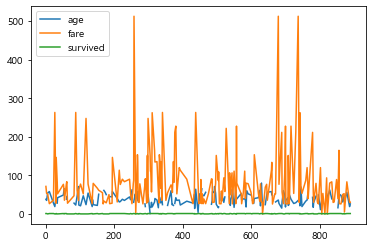

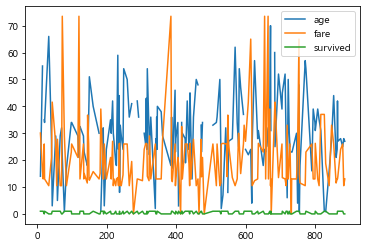

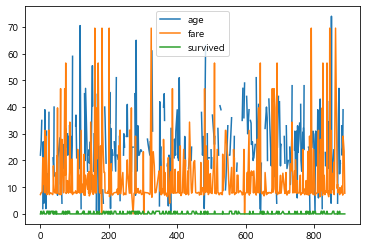

In [38]:
print(class_sex_group.get_group(('First', 'female')).head())
print()
print(class_sex_group.idxmax())   # idx 위치
class_sex_group.max()
class_sex_group.age.max()
class_group.plot()

In [39]:
class_sex_group.idxmax()

age  fare  survived
class  sex                        
First  female  275   258         1
       male    630   679        23
Second female  772   615         9
       male    672    72        17
Third  female  483   180         2
       male    851   159        36

In [40]:
class_sex_group.age

In [41]:
# 그룹 연산 메소드
class_group = df.groupby('class')
std_all = class_group.std()
print(std_all)

              age       fare  survived
class                                 
First   14.802856  78.380373  0.484026
Second  14.001077  13.417399  0.500623
Third   12.495398  11.778142  0.428949


In [42]:
for i in class_sex_group:
    print(i[1])
    print(i.index)
    print('-----------------------')

      age     sex  class      fare  survived
1    38.0  female  First   71.2833         1
3    35.0  female  First   53.1000         1
11   58.0  female  First   26.5500         1
31    NaN  female  First  146.5208         1
52   49.0  female  First   76.7292         1
..    ...     ...    ...       ...       ...
856  45.0  female  First  164.8667         1
862  48.0  female  First   25.9292         1
871  47.0  female  First   52.5542         1
879  56.0  female  First   83.1583         1
887  19.0  female  First   30.0000         1

[94 rows x 5 columns]
<built-in method index of tuple object at 0x00000219E0DC0680>
-----------------------
      age   sex  class      fare  survived
6    54.0  male  First   51.8625         0
23   28.0  male  First   35.5000         1
27   19.0  male  First  263.0000         0
30   40.0  male  First   27.7208         0
34   28.0  male  First   82.1708         0
..    ...   ...    ...       ...       ...
839   NaN  male  First   29.7000         1
857  51

In [43]:
# fare열의 표준편차가 1등석과 2등석간의 값의 차이가 심함
# fare열만 std() 구함
std_fare = class_group.fare.std()
print(std_fare)  # 시리즈로 반환됨 

class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64


In [44]:
df = titanic.loc[:, ['age','class', 'fare', 'survived']]
df.info()
class_group = df.groupby('class')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       714 non-null    float64 
 1   class     891 non-null    category
 2   fare      891 non-null    float64 
 3   survived  891 non-null    int64   
dtypes: category(1), float64(2), int64(1)
memory usage: 22.0 KB


In [45]:
class_group.head(2)

,age,class,fare,survived
0,22.0,Third,7.2500,0
1,38.0,First,71.2833,1
2,26.0,Third,7.9250,1
3,35.0,First,53.1000,1
9,14.0,Second,30.0708,1
15,55.0,Second,16.0000,1


In [46]:
# 그룹에 함수를 여러개 적용 : group.agg([함수 리스트])
agg_all = group.agg(['min', 'max'])
print(agg_all)

# 열 마다 다른 함수를 적용 : 
#  group.arr({'열1':함수1, '열2':함수2})
# age 는 중간값, 요금은 가장 비싼요금, 가장 싼 요금
agg_sep = class_group.agg({'fare':['max', 'min'],
                           'age' :'mean'})
agg_sep

       age   sex   fare  survived
min   0.42  male   0.00         0
max  74.00  male  69.55         1


fare             age
             max  min       mean
class                           
First   512.3292  0.0  38.233441
Second   73.5000  0.0  29.877630
Third    69.5500  0.0  25.140620

In [47]:
a = [1,2,3,4,5,6]
for i in a:
    continue


In [48]:
i

6

In [49]:
group # 앞의 for 문에서 group에 넣은 정보가 남아있음('Third','male')

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
4,35.0,male,Third,8.0500,0
5,NaN,male,Third,8.4583,0
7,2.0,male,Third,21.0750,0
12,20.0,male,Third,8.0500,0
...,...,...,...,...,...
877,19.0,male,Third,7.8958,0
878,NaN,male,Third,7.8958,0
881,33.0,male,Third,7.8958,0
884,25.0,male,Third,7.0500,0


In [50]:
#  그룹 연산 데이터 변환 : group.transform(매핑함수)
# 그룹별 age 열의 평균 집계 연산
age_mean = class_group.age.mean()
print(age_mean)
print('\n')

# 그룹별 age 열의 표준편차 집계 연산
age_std = class_group.age.std()
print(age_std)
print()
# 그룹 객체의 age 열을 iteration으로 z-score를 계산하여 출력
for key, group in class_group.age:
    group_zscore=(group - age_mean.loc[key])/age_std.loc[key]
    print(' -- origin : ', key)
    print(group_zscore.head(3))
    print()

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64


class
First     14.802856
Second    14.001077
Third     12.495398
Name: age, dtype: float64

 -- origin :  First
1   -0.015770
3   -0.218434
6    1.065103
Name: age, dtype: float64

 -- origin :  Second
9    -1.134029
15    1.794317
17         NaN
Name: age, dtype: float64

 -- origin :  Third
0   -0.251342
2    0.068776
4    0.789041
Name: age, dtype: float64



In [51]:
group

0      22.0
2      26.0
4      35.0
5       NaN
7       2.0
       ... 
882    22.0
884    25.0
885    39.0
888     NaN
890    32.0
Name: age, Length: 491, dtype: float64

In [52]:
key

'Third'

In [53]:
# z-score를 계산하는 사용자 함수 정의
def z_score(x): 
    return (x - x.mean()) / x.std()

age_trans = class_group.age.transform(z_score)
print(age_trans.loc[[1,9,0]])

1   -0.015770
9   -1.134029
0   -0.251342
Name: age, dtype: float64


In [54]:
age_trans

0     -0.251342
1     -0.015770
2      0.068776
3     -0.218434
4      0.789041
         ...   
886   -0.205529
887   -1.299306
888         NaN
889   -0.826424
890    0.548953
Name: age, Length: 891, dtype: float64

In [55]:
# 그룹 객체 필터링 :  group.filter(조건식 함수)
# 데이터 개수가 200개 이상인 그룹만 데이터프레임으로 변환
filter_group = class_group.filter(lambda x: len(x) >= 300)
print(filter_group.head())
len(filter_group)

    age  class     fare  survived
0  22.0  Third   7.2500         0
2  26.0  Third   7.9250         1
4  35.0  Third   8.0500         0
5   NaN  Third   8.4583         0
7   2.0  Third  21.0750         0


491

In [56]:
# 그룹 객체에 함수 매핑 group.apply(매핑함수)
agg_group = class_group.apply(lambda x: x.describe())
print(agg_group)# .describe() 수, 평균, 최대, 최소, 분위수...

# age열에 z_score함수를 적용
age_zscore = class_group.age.apply(z_score)
age_zscore.head()

# 나이의 평균이 30보다 작은 그룹만 데이터 출력
age_filter = class_group.apply(lambda x: x.age.mean() < 30)
print(age_filter)

for x in age_filter.index:
    if age_filter[x] == True:
        age_filter_df = class_group.get_group(x)
        print(age_filter_df.head())
        print()

                     age        fare    survived
class                                           
First  count  186.000000  216.000000  216.000000
       mean    38.233441   84.154687    0.629630
       std     14.802856   78.380373    0.484026
       min      0.920000    0.000000    0.000000
       25%     27.000000   30.923950    0.000000
       50%     37.000000   60.287500    1.000000
       75%     49.000000   93.500000    1.000000
       max     80.000000  512.329200    1.000000
Second count  173.000000  184.000000  184.000000
       mean    29.877630   20.662183    0.472826
       std     14.001077   13.417399    0.500623
       min      0.670000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000
       50%     29.000000   14.250000    0.000000
       75%     36.000000   26.000000    1.000000
       max     70.000000   73.500000    1.000000
Third  count  355.000000  491.000000  491.000000
       mean    25.140620   13.675550    0.242363
       std     12.49

In [57]:
df = titanic.loc[:, ['age','sex','class', 'fare', 'survived']]

In [58]:
class_group = df.groupby(['class', 'sex'])
gdf = class_group.mean()

print(type(gdf), gdf.index)
# 'First' 인덱스의 자료를 추출
print(gdf.loc['First'])
print()

# 'First', 'female'의 자료를 추출
print(gdf.loc[('First', 'female')])
print()

# 두번째 인덱스를 검색 : df.xs(컬럼의 원소, level=컬럼명)
# 'male' 인덱스 자료를 검색
print(gdf.xs('male', level='sex'))
print()
print(gdf.xs('Second', level='class'))

<class 'pandas.core.frame.DataFrame'> MultiIndex([( 'First', 'female'),
            ( 'First',   'male'),
            ('Second', 'female'),
            ('Second',   'male'),
            ( 'Third', 'female'),
            ( 'Third',   'male')],
           names=['class', 'sex'])
              age        fare  survived
sex                                    
female  34.611765  106.125798  0.968085
male    41.281386   67.226127  0.368852

age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64

              age       fare  survived
class                                 
First   41.281386  67.226127  0.368852
Second  30.740707  19.741782  0.157407
Third   26.507589  12.661633  0.135447

              age       fare  survived
sex                                   
female  28.722973  21.970121  0.921053
male    30.740707  19.741782  0.157407


In [59]:
print(gdf.xs('male', level='sex'))

              age       fare  survived
class                                 
First   41.281386  67.226127  0.368852
Second  30.740707  19.741782  0.157407
Third   26.507589  12.661633  0.135447


In [65]:
print(gdf.xs)

<bound method NDFrame.xs of                      age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447>


In [66]:
gdf.xs('First',level = 'class')

,age,fare,survived
sex,,,
female,34.611765,106.125798,0.968085
male,41.281386,67.226127,0.368852


In [67]:
gdf.xs(('First','female'),level = ('class','sex'))

,,age,fare,survived
class,sex,,,
First,female,34.611765,106.125798,0.968085


In [71]:
gdf.xs('age',axis = 1)

class   sex   
First   female    34.611765
        male      41.281386
Second  female    28.722973
        male      30.740707
Third   female    21.750000
        male      26.507589
Name: age, dtype: float64

In [72]:
gdf.xs

<bound method NDFrame.xs of                      age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447>

In [73]:
# 피벗 : pd.pivot_table() : 집계 함수를 행과 열, 데이터 지정
pdf = pd.pivot_table(df,     # 피벗할 데이터프레임
                     index='class',  # 행으로 갈 컬럼
                     columns='sex',  # 열로 갈 컬럼
                     values='age',  # 그룹함수에 적용할 데이터
                     aggfunc='mean') # 적용할 그룹함수
pdf

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [85]:
adf = pd.pivot_table(df,
                    index = 'sex',
                    columns = 'class',
                    values = ('age','fare'),
                    aggfunc = 'max')
adf

age                   fare              
class  First Second Third     First Second  Third
sex                                              
female  63.0   57.0  63.0  512.3292   65.0  69.55
male    80.0   70.0  74.0  512.3292   73.5  69.55

In [86]:
# 행인덱스는 : 클래스와 성별, 컬럼 : survived
# 값은 age, fare
# 함수는 mean, max 함수를 적용 pdf1을 생성
pdf1 = pd.pivot_table(df,     # 피벗할 데이터프레임
                     index=['class','sex'],  
                     columns='survived',   
                     values=['age','fare'],  
                     aggfunc=['mean','max']) 
pdf1

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  
       male     69.55   56.4958

In [87]:
# 행인덱스는 : 클래스와 성별, 컬럼 : survived
# 값은 age, fare
# 함수는 mean, max 함수를 적용 pdf1을 생성
pdf1 = pd.pivot_table(df,     # 피벗할 데이터프레임
                     index=['class','sex'],  
                     columns='survived',   
                     values=['age','fare'],  
                     aggfunc=['mean','max']) 
pdf1

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  
       male     69.55   56.4958

In [88]:
pdf1.xs('First', level='class')

mean                                      max                \
                age                   fare               age          fare   
survived          0          1           0           1     0     1       0   
sex                                                                          
female    25.666667  34.939024  110.604167  105.978159  50.0  63.0  151.55   
male      44.581967  36.248000   62.894910   74.637320  71.0  80.0  263.00   

                    
                    
survived         1  
sex                 
female    512.3292  
male      512.3292

In [89]:
# 클래스가 First이고 female인 행 을 추출
pdf1.xs(('First','female'))

            survived
mean  age   0            25.666667
            1            34.939024
      fare  0           110.604167
            1           105.978159
max   age   0            50.000000
            1            63.000000
      fare  0           151.550000
            1           512.329200
Name: (First, female), dtype: float64

In [90]:
# sex가 'male'인 행만 추출
pdf1.xs('male', level='sex')
pdf1.xs('male', level=1)

mean                                    max                \
                age                  fare              age          fare   
survived          0          1          0          1     0     1       0   
class                                                                      
First     44.581967  36.248000  62.894910  74.637320  71.0  80.0  263.00   
Second    33.369048  16.022000  19.488965  21.095100  70.0  62.0   73.50   
Third     27.255814  22.274211  12.204469  15.579696  74.0  45.0   69.55   

                    
                    
survived         1  
class               
First     512.3292  
Second     39.0000  
Third      56.4958

In [91]:
# 열을 출력 ( mean 의 결과만 출력 )
pdf1.xs('mean', axis=1)

age                   fare            
survived               0          1           0           1
class  sex                                                 
First  female  25.666667  34.939024  110.604167  105.978159
       male    44.581967  36.248000   62.894910   74.637320
Second female  36.000000  28.080882   18.250000   22.288989
       male    33.369048  16.022000   19.488965   21.095100
Third  female  23.818182  19.329787   19.773093   12.464526
       male    27.255814  22.274211   12.204469   15.579696

In [92]:
# 'mean'과 'age'만 출력
pdf1.xs(('mean','age'), axis=1)

survived               0          1
class  sex                         
First  female  25.666667  34.939024
       male    44.581967  36.248000
Second female  36.000000  28.080882
       male    33.369048  16.022000
Third  female  23.818182  19.329787
       male    27.255814  22.274211

In [93]:
# survived의 값이 1인 자료만 추출
pdf1.xs(1, level='survived', axis=1)

mean               max          
                     age        fare   age      fare
class  sex                                          
First  female  34.939024  105.978159  63.0  512.3292
       male    36.248000   74.637320  80.0  512.3292
Second female  28.080882   22.288989  55.0   65.0000
       male    16.022000   21.095100  62.0   39.0000
Third  female  19.329787   12.464526  63.0   31.3875
       male    22.274211   15.579696  45.0   56.4958

In [94]:
# 컬럼에서 max 의 'fare' 만 선택해서 추출
pdf1.xs(('max','fare',0), level=[0,1,2], axis=1)

max
                 fare
survived            0
class  sex           
First  female  151.55
       male    263.00
Second female   26.00
       male     73.50
Third  female   69.55
       male     69.55